# Name : Remilekun Ajayi

## Prediction of Restaurant Ratings Using Regression-Based Approach to Build a Predictive Model

### Problem Statement
- Restaurants are very important in the world today as they help to fulfill a pressing need which is hunger.
- However, the business is largely competitive and when customers are not satisfied it could lead to the restaurant being out of business.
- Understanding the cruicial factors which influences restaurant ratings and building a model around this factors can help improve customer satisfaction.
- The aim of my project is to analyse Restaurant data while using the aggregate ratings as my target variable, Explore the key attributes involved in this evaluation and as a data scientist, buikd a predictive model to evaluate restaurant ratings in order to enhance customer satisfaction and improve sales.

### Objectives of the Project
- Perform an Exploratory Data Analysis to understand ratings and ratings distribution, check for skewness and generally to understand my dataset.
- Do some feature analysis, check for correlation and check for the best regression model to use in my prediction.
- Identify essential patterns in customer preferences, types of cuisines, price range and the features involved in service provision.
- Check the impact of geolocation on my restaurant ratings.
- Build a proper regression model to predict the restaurant ratings based on my exploratory data analysis.
- Communicate my findings and insights.

### Data Understanding
- The dataset contains multiple features which are necessary to understand data analytics
- Restaurant Details: Restaurant details contains, Name, Location and Cuisine Type
- Customer Engagement: Contains Votes, reviews and Aggregate ratings.
- Pricing and Availability: Contains the Average Cost for two, table booking option and online delivery.
- Geolocation: Contains the Longitude and Latitude coordinates
- The target variable is included which contains the Aggregate rating

look at each column independently
how they influence the whole outcome

### Week One - Data Exploration
- Explore Dataset Dimensions. Check for missing values. Perform datatype conversions as needed.
- Analyze 'Aggregate Rating' distribution. Address any class imbalances.
- Calculate the statistics for numerical columns. Explore categorical variables. Identify top 5 cuisines and cities.

### Importing My Libraries

- I'll be importing my libraries which include numpy and pandas, matplotlib, seaborn, geopandas, point from shapely.geometry to help me with understanding and modifying my dataset.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
!pip install geopandas shapely contextily
from shapely.geometry import Point
import contextily as ctx  # For basemaps
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
URL = ('https://raw.githubusercontent.com/Oyeniran20/axia_class_cohort_7/refs/heads/main/Dataset%20.csv')

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/Oyeniran20/axia_class_cohort_7/refs/heads/main/Dataset%20.csv')

In [13]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


### Explaining My Dataset

 - There are 9551 rows and 21 columns.
 - The dataset shows that the data was collected in different countries. This shows that there are different currencies since the restaurants are located in different locations on earth.
 - The dataset contains the Longitude and Latitude of different locations, different cuisines, Votes and Ratings. The aggregate rating is the target variable. It's an integer. A numerical data.
 - My dataset contains a Yes or No column. This Yes or No Column gives a classification type of problem.

### Showing the Data Info and analyzing each column.

 - Here i use the df.info() function to check for my null columns in the dataset. This shows that there are three float types of data, 5 integer types and 13 objects.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

- I checked the value counts for my target variable which is the Aggregate rating. It shows that there are 2148 zero ratings. This is very significant because zero ratings are different from null values. This means that customers could eat at a restaurant without rating the restaurant. This may account for the values of the zero ratings.

In [18]:
df['Aggregate rating'].value_counts()

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant ID,9551.0,9.051128e+06,8.791521e+06,53.000000,301962.500000,6.004089e+06,1.835229e+07,1.850065e+07
Country Code,9551.0,1.836562e+01,5.675055e+01,1.000000,1.000000,1.000000e+00,1.000000e+00,2.160000e+02
Longitude,9551.0,6.412657e+01,4.146706e+01,-157.948486,77.081343,7.719196e+01,7.728201e+01,1.748321e+02
Latitude,9551.0,2.585438e+01,1.100794e+01,-41.330428,28.478713,2.857047e+01,2.864276e+01,5.597698e+01
Average Cost for two,9551.0,1.199211e+03,1.612118e+04,0.000000,250.000000,4.000000e+02,7.000000e+02,8.000000e+05
Price range,9551.0,1.804837e+00,9.056088e-01,1.000000,1.000000,2.000000e+00,2.000000e+00,4.000000e+00
Aggregate rating,9551.0,2.666370e+00,1.516378e+00,0.000000,2.500000,3.200000e+00,3.700000e+00,4.900000e+00
Votes,9551.0,1.569097e+02,4.301691e+02,0.000000,5.000000,3.100000e+01,1.310000e+02,1.093400e+04


In [20]:
df['City'].head()

0         Makati City
1         Makati City
2    Mandaluyong City
3    Mandaluyong City
4    Mandaluyong City
Name: City, dtype: object

#### Longitude and Latitude

The min value for the longitude is -157 and the maximum value is 172. This is fairly reasonable as this shows there are no outliers and the fact that there are different varying locations in the dataset. The normal range for longitude and latitude should be between -180 to 180.

The minimum value for the latitude should be -90 and the maximum value should be 90. The min latitude in the dataset is -43 and the maximum is 55.9. The values are still within the normal latitude range

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant ID,9551.0,9.051128e+06,8.791521e+06,53.000000,301962.500000,6.004089e+06,1.835229e+07,1.850065e+07
Country Code,9551.0,1.836562e+01,5.675055e+01,1.000000,1.000000,1.000000e+00,1.000000e+00,2.160000e+02
Longitude,9551.0,6.412657e+01,4.146706e+01,-157.948486,77.081343,7.719196e+01,7.728201e+01,1.748321e+02
Latitude,9551.0,2.585438e+01,1.100794e+01,-41.330428,28.478713,2.857047e+01,2.864276e+01,5.597698e+01
Average Cost for two,9551.0,1.199211e+03,1.612118e+04,0.000000,250.000000,4.000000e+02,7.000000e+02,8.000000e+05
Price range,9551.0,1.804837e+00,9.056088e-01,1.000000,1.000000,2.000000e+00,2.000000e+00,4.000000e+00
Aggregate rating,9551.0,2.666370e+00,1.516378e+00,0.000000,2.500000,3.200000e+00,3.700000e+00,4.900000e+00
Votes,9551.0,1.569097e+02,4.301691e+02,0.000000,5.000000,3.100000e+01,1.310000e+02,1.093400e+04


#### Checking for missing values



In [26]:
df.isna().sum().sort_values(ascending = False)

Cuisines                9
Restaurant ID           0
Currency                0
Rating text             0
Rating color            0
Aggregate rating        0
Price range             0
Switch to order menu    0
Is delivering now       0
Has Online delivery     0
Has Table booking       0
Average Cost for two    0
Restaurant Name         0
Latitude                0
Longitude               0
Locality Verbose        0
Locality                0
Address                 0
City                    0
Country Code            0
Votes                   0
dtype: int64

**Observations:**
- There are no missing values in my dataset.
- According to my value-counts, there are 2148 zero values in my target variable which is the aggregate rating.
- There are a lot of categorical data in my dataset which seem not quite important. I may really drop them along the way as they might not really serve me as it may cause problems for me with my model.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant ID,9551.0,9.051128e+06,8.791521e+06,53.000000,301962.500000,6.004089e+06,1.835229e+07,1.850065e+07
Country Code,9551.0,1.836562e+01,5.675055e+01,1.000000,1.000000,1.000000e+00,1.000000e+00,2.160000e+02
Longitude,9551.0,6.412657e+01,4.146706e+01,-157.948486,77.081343,7.719196e+01,7.728201e+01,1.748321e+02
Latitude,9551.0,2.585438e+01,1.100794e+01,-41.330428,28.478713,2.857047e+01,2.864276e+01,5.597698e+01
Average Cost for two,9551.0,1.199211e+03,1.612118e+04,0.000000,250.000000,4.000000e+02,7.000000e+02,8.000000e+05
Price range,9551.0,1.804837e+00,9.056088e-01,1.000000,1.000000,2.000000e+00,2.000000e+00,4.000000e+00
Aggregate rating,9551.0,2.666370e+00,1.516378e+00,0.000000,2.500000,3.200000e+00,3.700000e+00,4.900000e+00
Votes,9551.0,1.569097e+02,4.301691e+02,0.000000,5.000000,3.100000e+01,1.310000e+02,1.093400e+04


Working on other columns

In [31]:
df['Country Code'] = df['Country Code'].astype(str)

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant ID,9551.0,9.051128e+06,8.791521e+06,53.000000,301962.500000,6.004089e+06,1.835229e+07,1.850065e+07
Longitude,9551.0,6.412657e+01,4.146706e+01,-157.948486,77.081343,7.719196e+01,7.728201e+01,1.748321e+02
Latitude,9551.0,2.585438e+01,1.100794e+01,-41.330428,28.478713,2.857047e+01,2.864276e+01,5.597698e+01
Average Cost for two,9551.0,1.199211e+03,1.612118e+04,0.000000,250.000000,4.000000e+02,7.000000e+02,8.000000e+05
Price range,9551.0,1.804837e+00,9.056088e-01,1.000000,1.000000,2.000000e+00,2.000000e+00,4.000000e+00
Aggregate rating,9551.0,2.666370e+00,1.516378e+00,0.000000,2.500000,3.200000e+00,3.700000e+00,4.900000e+00
Votes,9551.0,1.569097e+02,4.301691e+02,0.000000,5.000000,3.100000e+01,1.310000e+02,1.093400e+04


The Average cost for two is weird.
- This is weird because the max value is is 80,000. the 75% is 700. This discrepancy is too much as the gap between those two values are too much.
- The 50% is 400, the 25% is 250 and the min value is 7. This shows that due to the difference in locations, currency values can be largely varrying.
- This is true as Indian Rupees is present, India is a country in Asia. Botswanna Pula is also present. Botswanna is a country in Africa. Emirati Diram (AED) is also presnt. AED is an Arab country.
- This shows that the dataset is really diverse. So diverse in the sense that the countries and currencies are very far apart.
- To solve this problem, I will equate all the cuurencies to the US Dollar ($) in order to have a uniform currency rate and eliminate outliers.

In [34]:
if 'Currency' in df.columns:
    print(df['Currency'].unique())

['Botswana Pula(P)' 'Brazilian Real(R$)' 'Dollar($)' 'Emirati Diram(AED)'
 'Indian Rupees(Rs.)' 'Indonesian Rupiah(IDR)' 'NewZealand($)'
 'Pounds(��)' 'Qatari Rial(QR)' 'Rand(R)' 'Sri Lankan Rupee(LKR)'
 'Turkish Lira(TL)']


In [35]:
# Define approximate exchange rates (as of recent data)
currency_rates = {
    'Botswana Pula(P)': 0.073,    # 1 Pula ≈ 0.073 USD
    'Brazilian Real(R$)': 0.20,   # 1 BRL ≈ 0.20 USD
    'Dollar($)': 1.0,             # USD remains the same
    'Emirati Diram(AED)': 0.27,   # 1 AED ≈ 0.27 USD
    'Indian Rupees(Rs.)': 0.012,  # 1 INR ≈ 0.012 USD
    'Indonesian Rupiah(IDR)': 0.000065,  # 1 IDR ≈ 0.000065 USD
    'NewZealand($)': 0.61,        # 1 NZD ≈ 0.61 USD
    'Pounds(£)': 1.30,            # 1 GBP ≈ 1.30 USD
    'Qatari Rial(QR)': 0.27,      # 1 QAR ≈ 0.27 USD
    'Rand(R)': 0.053,             # 1 ZAR ≈ 0.053 USD
    'Sri Lankan Rupee(LKR)': 0.0031,  # 1 LKR ≈ 0.0031 USD
    'Turkish Lira(TL)': 0.032     # 1 TRY ≈ 0.032 USD
}

In [36]:
df['Average Cost for two(USD)'] = df['Average Cost for two'] * df['Currency'].map(currency_rates)

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant ID,9551.0,9.051128e+06,8.791521e+06,53.000000,301962.500000,6.004089e+06,1.835229e+07,1.850065e+07
Longitude,9551.0,6.412657e+01,4.146706e+01,-157.948486,77.081343,7.719196e+01,7.728201e+01,1.748321e+02
Latitude,9551.0,2.585438e+01,1.100794e+01,-41.330428,28.478713,2.857047e+01,2.864276e+01,5.597698e+01
Average Cost for two,9551.0,1.199211e+03,1.612118e+04,0.000000,250.000000,4.000000e+02,7.000000e+02,8.000000e+05
Price range,9551.0,1.804837e+00,9.056088e-01,1.000000,1.000000,2.000000e+00,2.000000e+00,4.000000e+00
Aggregate rating,9551.0,2.666370e+00,1.516378e+00,0.000000,2.500000,3.200000e+00,3.700000e+00,4.900000e+00
Votes,9551.0,1.569097e+02,4.301691e+02,0.000000,5.000000,3.100000e+01,1.310000e+02,1.093400e+04
Average Cost for two(USD),9471.0,9.678978e+00,1.574017e+01,0.000000,3.600000,6.000000e+00,9.600000e+00,5.000000e+02


- Since I have unified my currencies, I'll be dropping the average cost for two.

In [39]:
df.drop(columns=['Average Cost for two']).describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant ID,9551.0,9.051128e+06,8.791521e+06,53.000000,301962.500000,6.004089e+06,1.835229e+07,1.850065e+07
Longitude,9551.0,6.412657e+01,4.146706e+01,-157.948486,77.081343,7.719196e+01,7.728201e+01,1.748321e+02
Latitude,9551.0,2.585438e+01,1.100794e+01,-41.330428,28.478713,2.857047e+01,2.864276e+01,5.597698e+01
Price range,9551.0,1.804837e+00,9.056088e-01,1.000000,1.000000,2.000000e+00,2.000000e+00,4.000000e+00
Aggregate rating,9551.0,2.666370e+00,1.516378e+00,0.000000,2.500000,3.200000e+00,3.700000e+00,4.900000e+00
Votes,9551.0,1.569097e+02,4.301691e+02,0.000000,5.000000,3.100000e+01,1.310000e+02,1.093400e+04
Average Cost for two(USD),9471.0,9.678978e+00,1.574017e+01,0.000000,3.600000,6.000000e+00,9.600000e+00,5.000000e+02


### Checking for the top 5 cuisines and cities

I'm checking first for the top 5 cuisines. According to my code below, It shows that North Indian Cuisine, North Indian Chinese Cuisine, Chinese Cuisine, Fast Food and North Indian, Mughlai are the top 5 cuisines.

I'm checking again for the top five cities using the value counts method

Checking the top five cities below show that the top five cities include: New Delhi which has a total of 5473 restaurants, Gurgaon with a total of 1113 restaurants, Noida with a total of 1080 restaurants, Faridabad with 251 restaurants and Ghaziabad with 25 restaurants.

In [44]:
new_cuisines = df['Cuisines'].str.split(',').explode().reset_index(drop=True)

In [45]:
top_five_cuis=new_cuisines.value_counts(ascending=False).head(5)

In [46]:
top_five_cuis

Cuisines
North Indian     2992
 Chinese         1880
 Fast Food       1314
 North Indian     968
Chinese           855
Name: count, dtype: int64

In [47]:
top_five_cities = df['City'].value_counts(ascending = False).head(5)

In [48]:
top_five_cities

City
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: count, dtype: int64

I'm going to be visualising my top 5 cuisines using seaborn and possibly matplotlib.

In [50]:
top_five_cities.index

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad'], dtype='object', name='City')

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Ajayi Family\AppData\Local\Temp\ipykernel_6932\4234629766.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_five_cities.values, x=top_five_cities.index, palette = 'viridis')


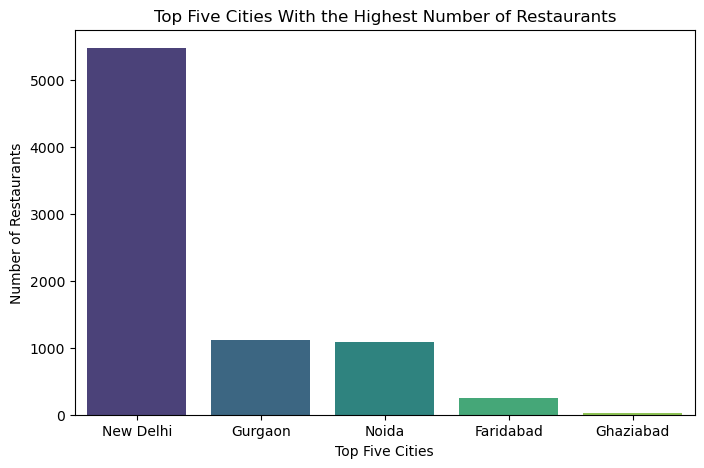

In [52]:
# Checking for the top five cities
plt.figure(figsize=(8, 5))
sns.barplot(y=top_five_cities.values, x=top_five_cities.index, palette = 'viridis')
plt.ylabel('Number of Restaurants')
plt.xlabel('Top Five Cities')
plt.title('Top Five Cities With the Highest Number of Restaurants')
plt.show()

C:\Users\Ajayi Family\AppData\Local\Temp\ipykernel_6932\3345214757.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_five_cuis.index, y=top_five_cuis.values, color='red', palette='viridis')


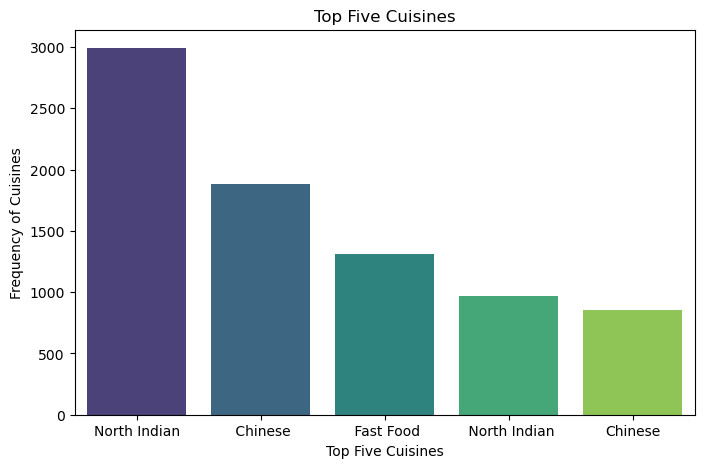

In [53]:
# checking for the top five cuisines
plt.figure(figsize=(8, 5))
sns.barplot(x=top_five_cuis.index, y=top_five_cuis.values, color='red', palette='viridis')
plt.xlabel('Top Five Cuisines')
plt.ylabel('Frequency of Cuisines')
plt.title('Top Five Cuisines')
plt.show()

In [115]:
top_five_cuis.index

Index(['North Indian', ' Chinese', ' Fast Food', ' North Indian', 'Chinese'], dtype='object', name='Cuisines')

In [119]:
top_five_cuis.values

array([2992, 1880, 1314,  968,  855], dtype=int64)

- From the Visualisations above, We can see the top five cities.
- The top five cities with the highest number of  Restaurants.
- New Delhi is apparently leading and topping the chart as it has 5000+ restaurants. The second is Gurgaon with 1100+ Number of Restaurants. It is notable to see that most of the top five cities are in Asia. 

- The second barchart shows the top five cuisines. North Indian Cuisine apparently tops the chart.
- The first is North Indian Cuisine, second is Chinese Cuisine, Third is Fast Food, The fourth is North Indian and the fifth is Chinese again
- After enough data cleaning , I was able to extract the exact five cuisines instead of clumped up cuisines. 

### Week Two - Data Visualization 

#### Visualizations
- Create histograms, bar plots, and boxplots of ratings.
- Compare average ratings across cuisines and cities

#### Geospatial Analysis 
- Map restaurant locations using coordinates.
- Analyze distribution across cities.
- Correlate location with ratings

#### Identification of Outliers and their effects.
- Determination of relationship between votes and ratings.

#### Visualizing My Aggregate Rating Column

- I'm going to be visualizing my aggregate rating using histplot and boxplot just to show the distribution of the ratings, How frequent each ratings are and to check to see the right approach to manage my aggregate ratings
- I'll be using my boxplot to show my outliers. 

In [129]:
Aggregate_Rating_Counts = df['Aggregate rating'].value_counts().sort_values(ascending = False)
print('Rating Frequency:')
print(Aggregate_Rating_Counts)

Rating Frequency:
Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


#### Showing the Distribution of Aggregate Rating

- I'll use a BarChart to visualize my aggregate ratings. 

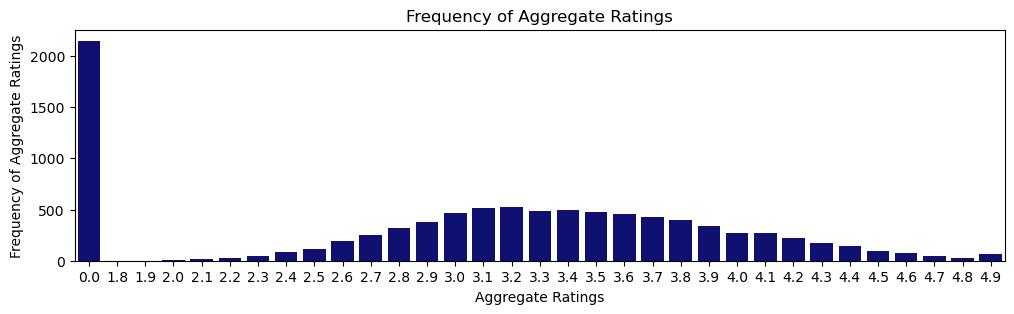

In [133]:
plt.figure(figsize=(12, 3))
sns.barplot(x=Aggregate_Rating_Counts.index, y=Aggregate_Rating_Counts.values, color='navy')
plt.title('Frequency of Aggregate Ratings')
plt.xlabel('Aggregate Ratings')
plt.ylabel('Frequency of Aggregate Ratings')
plt.show()

- The distribution above shows the frequency of Aggregate Ratings. There is a high number of zeros as indicated on the zero value. This shows that many people may eat at a restaurant and not rate the restaurant. 

### Histogram and Boxplot of Ratings
I'll be using histogram to show the visualisation of my ratings and Boxplot to show and visualize the outliers in my target variable 

Aggregate_Ratings_Counts 
 skew = -0.9541304733200109


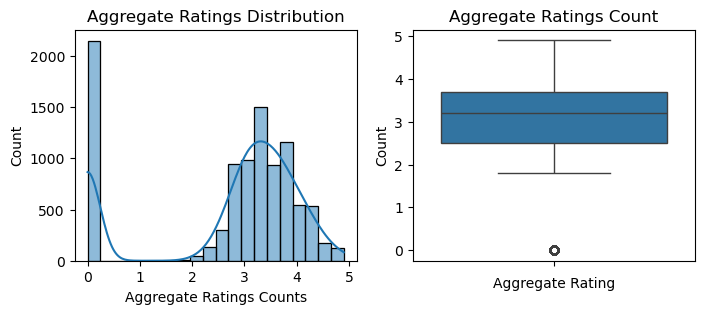

In [137]:
    plt.figure(figsize=(8, 3))
    skewness = df['Aggregate rating'].skew()
    print(f'{'Aggregate_Ratings_Counts'} \n skew = {skewness}')
    plt.subplot(1, 2, 1)
    sns.histplot(df['Aggregate rating'], kde=True, bins=20)
    plt.title('Aggregate Ratings Distribution')
    plt.xlabel('Aggregate Ratings Counts')
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    sns.boxplot(df['Aggregate rating'])
    plt.title('Aggregate Ratings Count')
    plt.xlabel('Aggregate Rating')
    plt.ylabel('Count')
   
    
    plt.show()

##### Observations

- This visualization above shows the histogram and boxplot of the target variable which is the aggregate rating.
- There are two peaks in my target variable. One around 0 and another between 3 amd 4.
- This means that lower ratings are more frequent based on the fact that some people may rate the restaurants while others may not rate the restaurants at all.
- The boxplot shows that there is an outlier leaning towards zero

##### Analysis of my average ratings in comparison to other columns

- Here I'll visualize my aggregate ratings based on the other columns in my dataset such as Cuisines, Table Booking, Online Delivery, Delivering Now, Switch to order menu, Price Range, Rating Colour and Votes. 

In [141]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Average Cost for two(USD)
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,80.30
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,87.60
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,292.00
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,109.50
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,109.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,2.56
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,3.36
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,5.44
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,3.84


##### Analysis of Aggregate Ratings per cuisine

- Here I'll visualize my aggregate ratings per the number of cuisines. This helps me to Identify my most rated cuisines and the least rated cuisine.
- This helps To identify and understand what types of food the customers found the most appealing

In [146]:
top_cuisines = df['Cuisines'].value_counts().head(20).index

In [148]:
filtered_data = df[df['Cuisines'].isin(top_cuisines)]

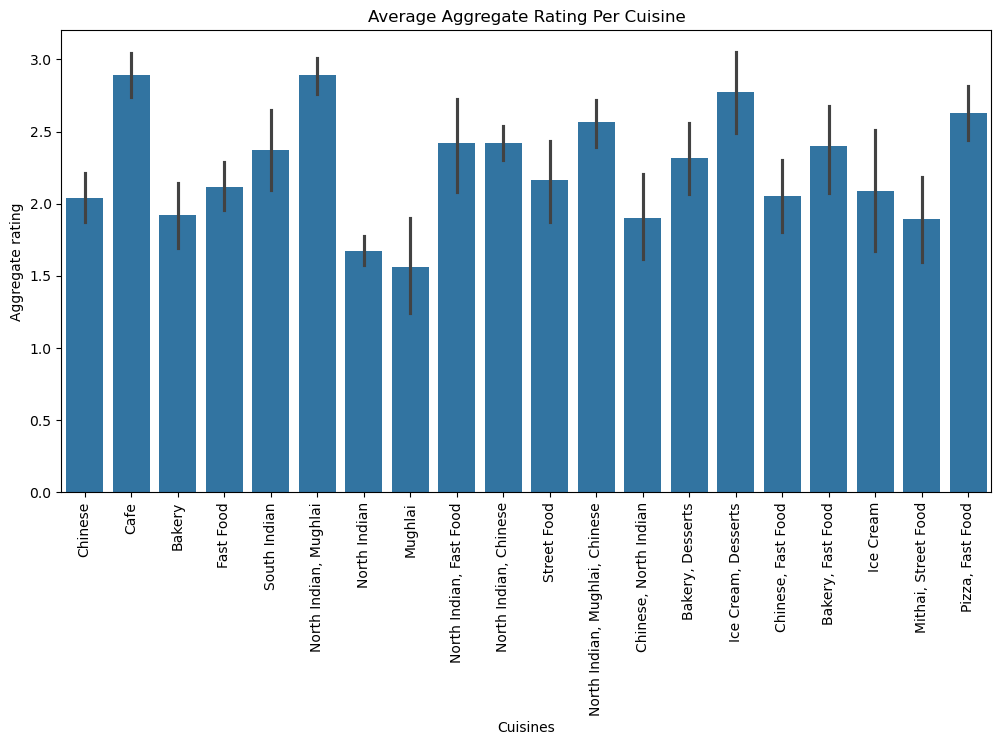

In [150]:
plt.figure(figsize=(12,6))
sns.barplot(x='Cuisines', y='Aggregate rating', data=filtered_data)
plt.xticks(rotation = 90)
plt.title('Average Aggregate Rating Per Cuisine')

plt.show()

- According to the visuals above, The cuisine with the highest rating is Cafe and North Indian, Mughlai. This shows two instances:
- That most people who ate Cafe cuisine rated the restaurant.
- The second intance is that a lot of who preferred the certain cuisine were people who enjoyed rating or people who were conversant with the rating process. 

##### Comparison of Average Ratings Across Cities

In [153]:
top_cities = df['City'].value_counts().head(20).index

In [154]:
city_df = df[df['City'].isin(top_cities)]

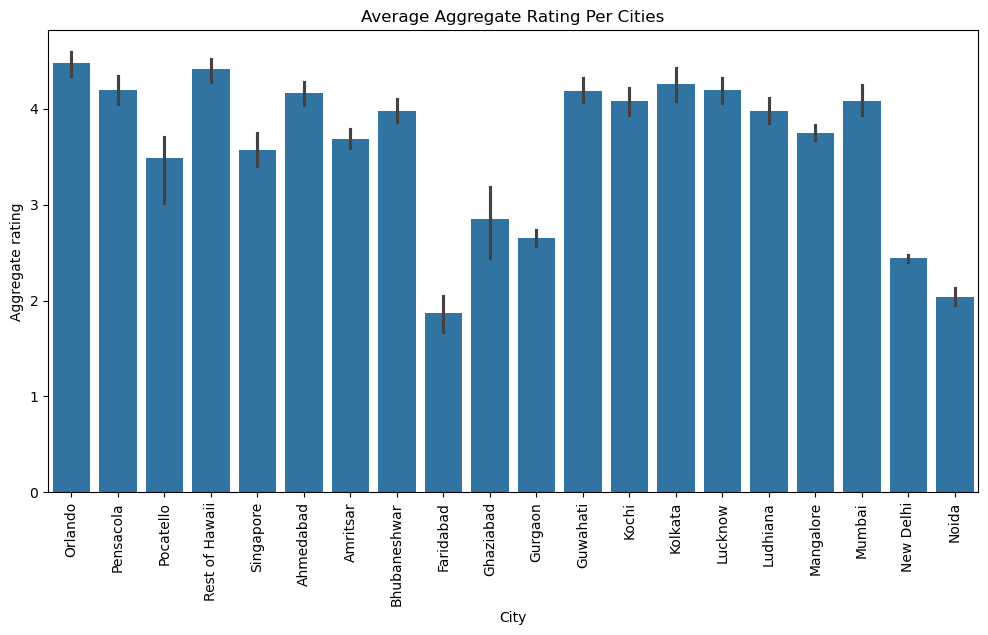

In [155]:
plt.figure(figsize=(12,6))
sns.barplot(x='City', y='Aggregate rating', data=city_df)
plt.xticks(rotation = 90)
plt.title("Average Aggregate Rating Per Cities")

plt.show()

- From the Visuals above We can see the top cities with the highest number of Aggregate Ratings
- Orlando is the city with the highest rating with a 4. rating and above.
- Hawaii is the second city with the largest amount of ratings

### Geo-spatial analysis

- For this, I'll be importing my libraries which will help me to do a geo spatial analysis.
- These libraries are geopandas, pandas, matplotlib, shapely, and contextily

- The processes below shows the loading of the dataset in the first codes
- The second step indicates the conversion of latitude and longitude into geometric points for easy visualisation
- The third step involves the creation of a GeoDataFrame to make spatial analysis and geopandas easy for visualisation.
- A geodataframe will also help me mark clusters within a certain area

In [166]:
# Load your dataset (ensure it has 'latitude' & 'longitude' columns)
data = pd.read_csv('https://raw.githubusercontent.com/Oyeniran20/axia_class_cohort_7/refs/heads/main/Dataset%20.csv') 

# Convert lat/lon into geometric Points
geometry = [Point(xy) for xy in zip(data['Longitude'], data['Latitude'])]

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")  # WGS 84 projection

- The distribution below shows clusters of restaurants. 
- Though the map isn't visible, It just helps identify the clusters. 

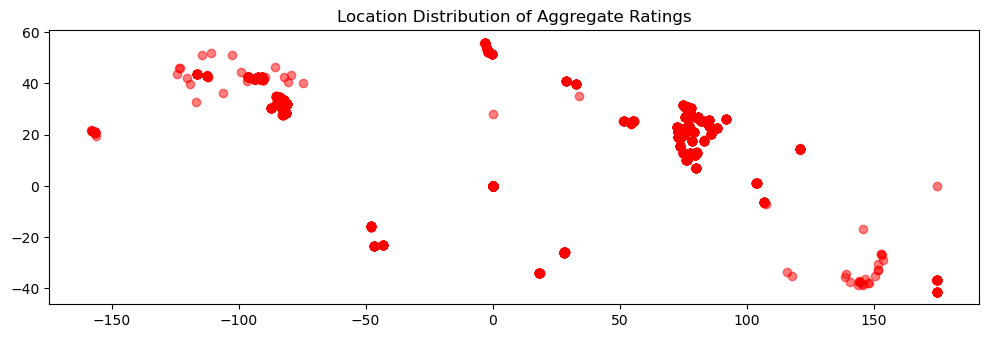

In [168]:
gdf.plot(figsize=(12, 8), marker='o', color='red', alpha=0.5)
plt.title("Location Distribution of Aggregate Ratings")
plt.show()

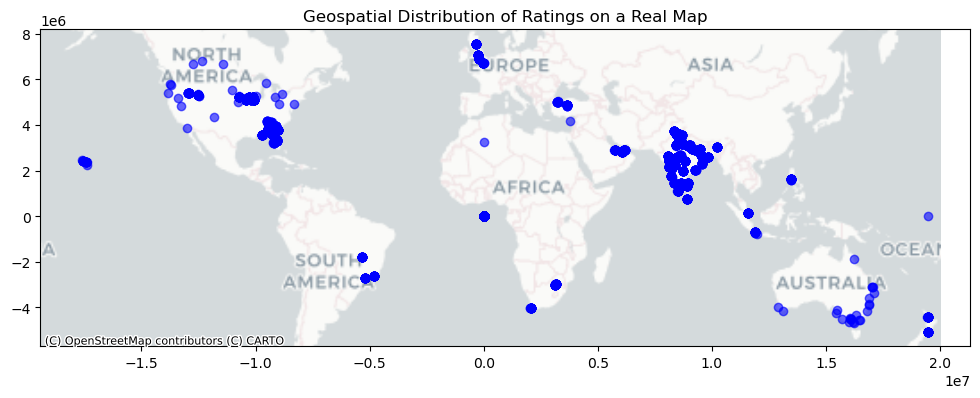

In [169]:
# Convert to Web Mercator projection for proper overlay
gdf = gdf.to_crs(epsg=3857)

# Plot with basemap
ax = gdf.plot(figsize=(12, 8), marker='o', color='blue', alpha=0.6)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
plt.title("Geospatial Distribution of Ratings on a Real Map")
plt.show()

- At this point, my codes were not really displaying on a real map, so I decided to move on and Evaluate my Aggregate Rating and also improve my codes to show on a real map. 

### Evaluation of Aggregate Ratings based on Locations

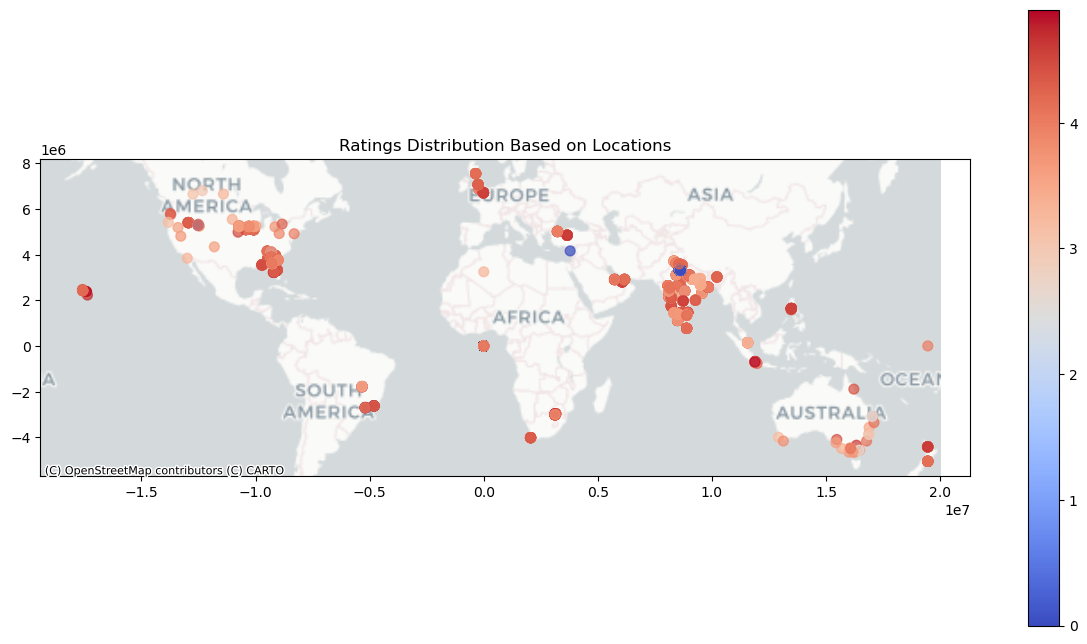

In [172]:
fig, ax = plt.subplots(figsize=(15, 8))
gdf.plot(ax=ax, column="Aggregate rating", cmap="coolwarm", legend=True, markersize=50, alpha=0.7)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
plt.title("Ratings Distribution Based on Locations")
plt.show()

- After evaluating my aggregate ratings distribution based on locations, I was able to see and understand the distribution better.
- But still, I was not content with the display so I decided to work on my codes to make it look a little better
- From Shapely.geometry, I Imported Points. 

In [174]:
# Load data (must have 'latitude' and 'longitude' columns)
df = pd.read_csv('https://raw.githubusercontent.com/Oyeniran20/axia_class_cohort_7/refs/heads/main/Dataset%20.csv')

# Convert lat/lon to geometric Points
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]

# Create a GeoDataFrame with proper coordinate reference system (CRS)
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")  # WGS 84 (lat/lon)

- Converting to Web Mercaptor Projection and to use the contextily which i imported in order to produce a clean map. 

In [176]:
gdf = gdf.to_crs(epsg=3857)  # Convert to Web Mercator projection

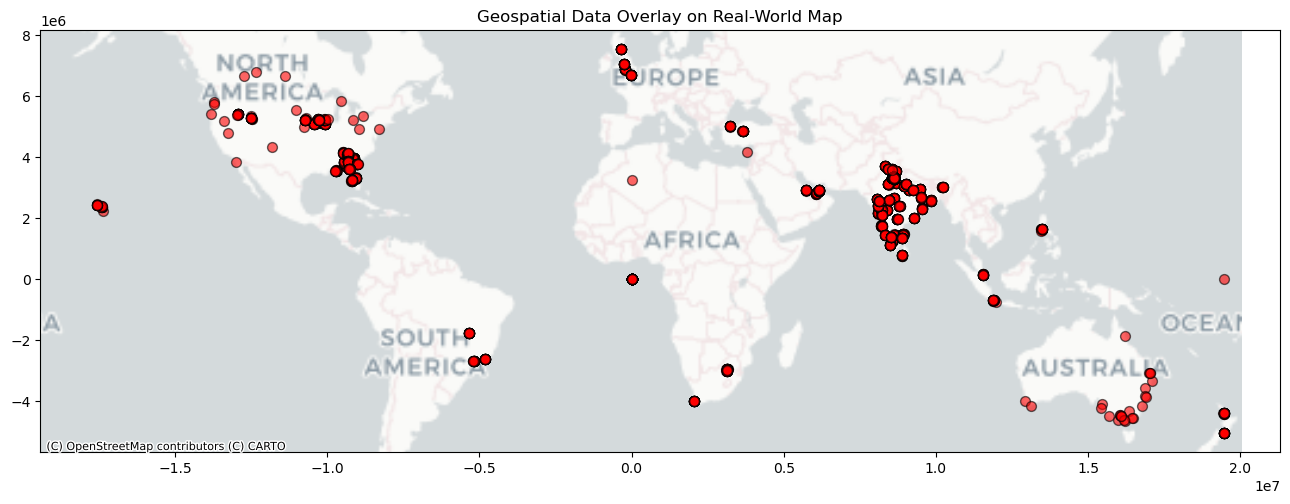

In [178]:
fig, ax = plt.subplots(figsize=(16, 8))

# Plot geospatial points
gdf.plot(ax=ax, marker='o', color='red', alpha=0.6, markersize=50, edgecolor="black")

# Add basemap from contextily (CartoDB Positron for a clean map)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.title("Geospatial Data Overlay on Real-World Map")
plt.show()

- At last I'm okay with the final view and it is evident that:
- The cuisines and Restaurants span across different continents.
- South America has the least number of Restaurants in the dataset and the restaurant locations are relatively close together.


- Asia has the highest number of cities with the highest number of Restaurants in them.
- In Asia though it is possible that the cities are in a small number of countries because the restaurants are closely packed and there is a large population.
- The continent with the second highest number of restaurants is north America.
- Although the restaurants in North America are distributed unevenly across the countries in the continents. 

#### Outliers and their effects


- To show outliers, I'll be using the boxplot

In [183]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [184]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

- The process below is done to extract the numerical columns from the datasets
- It shows the names of all the columns with numbers in the dataset. 

In [186]:
num_col = df.select_dtypes(include=np.number).columns

In [187]:
num_col

Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')

- Extracting the categorical columns show the columns which contains string or objects in them.
- Now I have my categorical columns and Numerical columns

In [189]:
cat_col = df.select_dtypes(include=['object']).columns

In [190]:
cat_col

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')

- I'll be creating a new numerical column for easy visualisation
- The new numerical column consist of Average cost for two, price range, Aggregate rating and votes.
- To do this, I'll be dropping the irrelevant numerical columns in order to have a new pure column.

In [192]:
new_num_col = num_col.drop(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude'])

In [193]:
new_num_col

Index(['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'], dtype='object')

- In the processes below, I'll be visualising my new numerical column using histplot to show the distribution and boxplot to show the outliers.

Average Cost for two 
 skew = 35.477914900871276


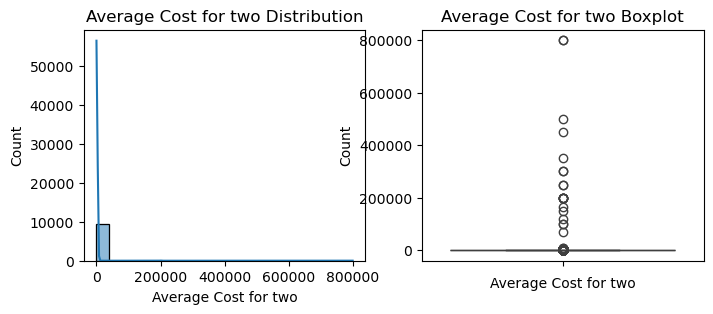

Price range 
 skew = 0.8896175931442


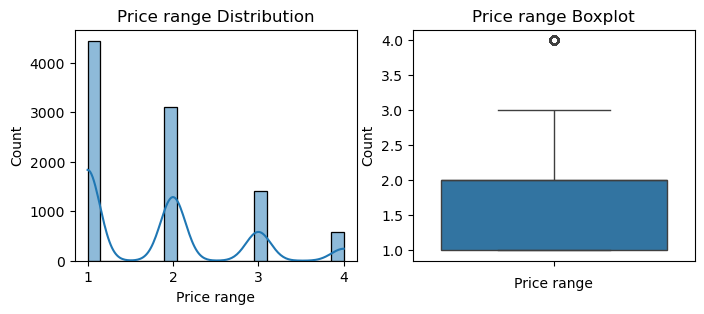

Aggregate rating 
 skew = -0.9541304733200109


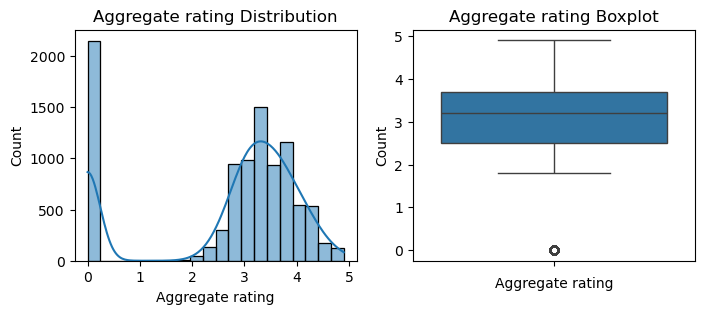

Votes 
 skew = 8.807636687709472


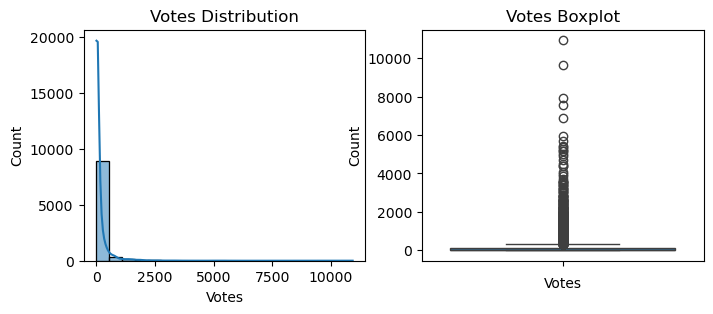

In [195]:
for col in new_num_col:
    skewness=df[col].skew()
    print (f'{col} \n skew = {skewness}')
    plt.figure(figsize=(8, 3))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel('Count')

    plt.subplot(1,2,2)
    sns.boxplot(df[col])
    plt.title(f'{col} Boxplot')
    plt.xlabel(col)
    plt.ylabel('Count')


    plt.show()

#### Notes on Average Cost for Two


- From my Visualisation above, The average cost for two has a positive skewness of 35.
- This indicated a Right skewed data
- It clearly shows that there are missing parts in my dataset
- Before my predictive modelling, I'll work on this in week 4 using the log transformation to reduce the skewness.
- The Boxplot also Indicates an outlier.
- From the distribution, I also presume that my average cost for two haven't been converted to USD in the dataset(df).
- This indicates the high number of outliers.
- I'll fix this in my dataset by converting the Average Cost for two to USD due to the discrepancies in currency.
- When working on my feature engineering, I'll create a new column with the Average cost for two to properly reduce skewness, then do my logarithm transformation.  

#### Notes on Price range distribution

- This is also right skewed as 1 has the highest count and 4 has the lowest count.
- The skewness is not much.|

#### Notes on Aggregate Rating

- Aggregate rating shows a normal distribution with a little bit of left tail.
- The skewness is negative due to the excessive number of 0 ratings.
- The zero ratings are the high number of outliers which caused the skewness in the boxplot.

#### Notes on Votes Distribution

- The votes boxplot shows a high number of outliers
- Histoplot shows a right tailed distribution
- The data is a right skewed.

In [202]:
new_num_col

Index(['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'], dtype='object')

#### Relationship between Votes and Ratings

- I'll determine the relationship between votes and ratings using a Bivariate analysis system.
- I'll be using scatterplot to visualise the relationship between votes and ratings

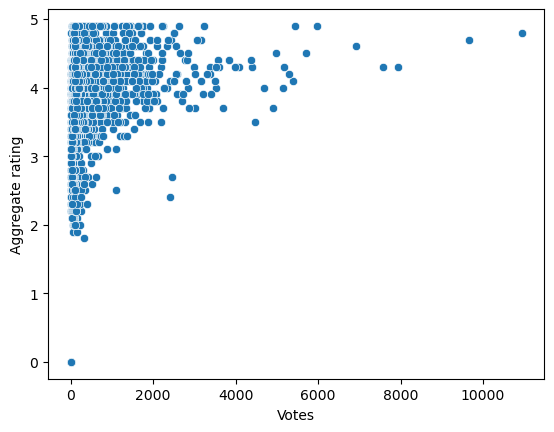

In [205]:
sns.scatterplot(data=df, x='Votes', y='Aggregate rating')
plt.show()

#### Observations

- From my scatterplot above, It is evident that:
- Ratings cluster above 3.5
- This shows that restaurants who have been well rated tend to get more customer engagement.
- Restaurants which are poorly rated do not get enough votes.
- This shows that poorly rated restaurants don't have so many reviews.
- Less than 2000 votes are clearly clustered together. This shows that many restaurants have low votes but high ratings.
- This can indicate the presence of new restaurants with a loyal customer base.
- It can also indicate restaurants serving a small number of people or restaurants serving a less popular type of cuisine. 

### Week 3 - Customer Preferences

#### Analysis and Identification of Highest Rated Cuisines

In [209]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [211]:
Highest_Rated_cuisines = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

In [212]:
Highest_Rated_cuisines

Cuisines
Italian, Deli                     4.9
Hawaiian, Seafood                 4.9
American, Sandwich, Tea           4.9
Continental, Indian               4.9
European, Asian, Indian           4.9
                                 ... 
Fast Food, Desserts, Beverages    0.0
Fast Food, Chinese, Burger        0.0
Cafe, French                      0.0
Seafood, Mughlai, North Indian    0.0
Fast Food, Mughlai, Armenian      0.0
Name: Aggregate rating, Length: 1825, dtype: float64

In [213]:
Highest_Rated_cuisines.head(50)

Cuisines
Italian, Deli                                                  4.900000
Hawaiian, Seafood                                              4.900000
American, Sandwich, Tea                                        4.900000
Continental, Indian                                            4.900000
European, Asian, Indian                                        4.900000
European, Contemporary                                         4.900000
European, German                                               4.900000
BBQ, Breakfast, Southern                                       4.900000
American, Coffee and Tea                                       4.900000
Sunda, Indonesian                                              4.900000
American, Burger, Grill                                        4.900000
Mughlai, Lucknowi                                              4.900000
Mexican, American, Healthy Food                                4.900000
American, Caribbean, Seafood                           

C:\Users\Ajayi Family\AppData\Local\Temp\ipykernel_6932\551998867.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_rated_cuisines.values, y=most_rated_cuisines.index, palette='viridis')


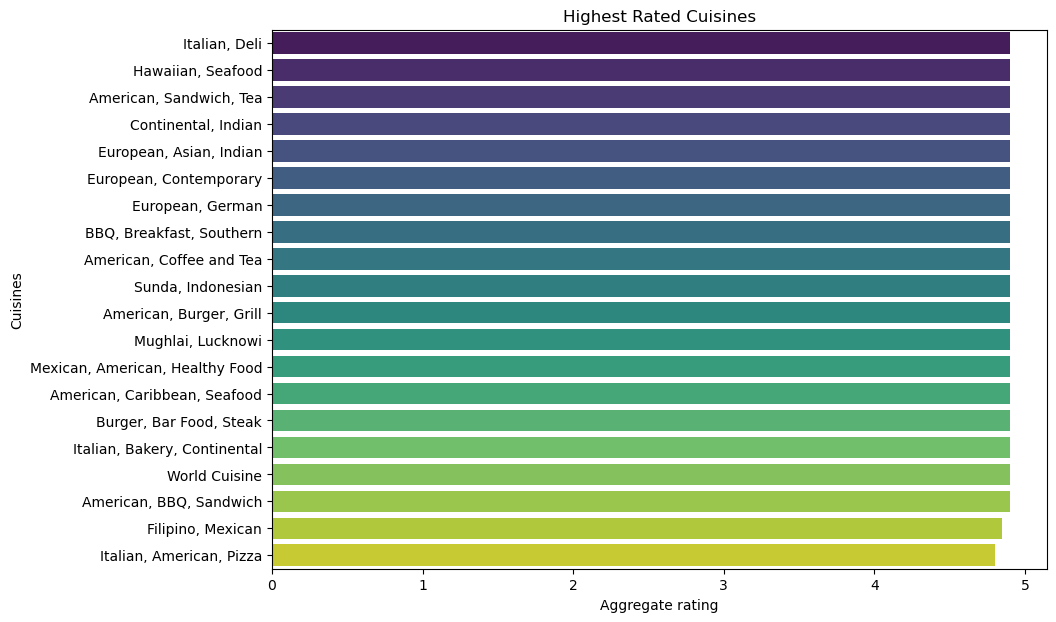

In [214]:
most_rated_cuisines = Highest_Rated_cuisines.head(20)

plt.figure(figsize=(10, 7))
sns.barplot(x=most_rated_cuisines.values, y=most_rated_cuisines.index, palette='viridis')
plt.xlabel('Aggregate rating')
plt.ylabel('Cuisines')
plt.title('Highest Rated Cuisines')

plt.show()

- The visualisation above shows the highest rated 20 cuisines with an aggregate rating of 4.8 and above.
- Now that I've seen my highest rated cuisines, i want to check if regional preferences affect ratings.
- What does It mean when regional preferences affect ratings?
#### Relationship and Factors that show if the preferences of some cities or region can affect how certain cuisines are being rated there. 
- Regional preferences affecting the Aggregate Rating of certain cuisines means that a cuisines popularity may depend on where It is being served. For example, In a typical Nigerian locality, Amala and Ewewdu may be highly rated more in the southwest compared to the eastern part of the country which has a lot of Igbo people whose cultural and go-to dish isn't Amala and Ewedu. Amala and Ewewdu being highly rated in the southwest and being poorly rated in the Eastern part of Nigeria may affect how the dish is being perceived if analysed on a larger scale like this.
- Looking at the dataset, Sushi might be more rated in coastal cities where fresh seafood is common.
- Spicy Indian Food might get lower ratings in places where milder food flavours are preferred.
- Some of these Cuisines require specific ingredients that may not be available everywhere.
- Some cuisines also require specific trained chefs.
- Lack of proper chefs and proper ingredients may lead to lower food ratings in certain regions.
- Other factors which may affect cuisine and Cuisine rating is Restaurant Competition and expectation.
- In Thailand, Most Restaurants compete heavily and demand Ratings, So ratings might be significantly higher there.
- Socioeconomic factors may also affect restaurant ratings. French cuisine may be highly rated lower in certain regions where people expect something lower. Fast Food may be rated higher in busy places where people move about and have no time to really make home cooked meals

#### Checking if Regional Preferences affect Ratings

In [217]:
highest_rated = df.groupby(['Locality', 'Cuisines'])['Aggregate rating'].mean().reset_index()
highest_rated = highest_rated.sort_values(['Locality', 'Aggregate rating'], ascending = [True, False])
highest_rated

,Locality,Cuisines,Aggregate rating
0,"ILD Trade Centre Mall, Sohna Road","Cafe, Beverages",3.4
1,"ILD Trade Centre Mall, Sohna Road","North Indian, Mughlai",2.7
2,"12th Square Building, Banjara Hills","Mughlai, North Indian, Chinese",4.3
3,"A Hotel, Gurdev Nagar","North Indian, Chinese, Fast Food",3.6
4,"ARSS Mall, Paschim Vihar","North Indian, South Indian, Chinese, Mithai, F...",3.1
...,...,...,...
7054,�guas Claras,"Mexican, Grill",4.3
7053,�guas Claras,"Bar Food, Brazilian",3.6
7055,�guas Claras,Pizza,3.1
7056,�ukurambar,"Patisserie, Coffee and Tea",3.4


- The table shown above confirm a little bias that cuisines in certain locations are rated based on the acceptance of such cuisines in those areas. 

#### Price Range and Comparison of Ratings across Price Points

In [220]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


- What Price Ranges Received the Highest Ratings?

In [222]:
df['Price range'].unique()

array([3, 4, 2, 1], dtype=int64)

In [225]:
df[['Price range', 'Aggregate rating']].head(20)

,Price range,Aggregate rating
0,3,4.8
1,3,4.5
2,4,4.4
3,4,4.9
4,4,4.8
5,3,4.4
6,4,4.0
7,4,4.2
8,4,4.9
9,3,4.8


- The Price Range with the Highest Ratings are 3 and 4. This is evident up to the 18th column. I'll be visualising this using a barplot

C:\Users\Ajayi Family\AppData\Local\Temp\ipykernel_6932\2481549522.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price range', y='Aggregate rating', data=df, palette='viridis')


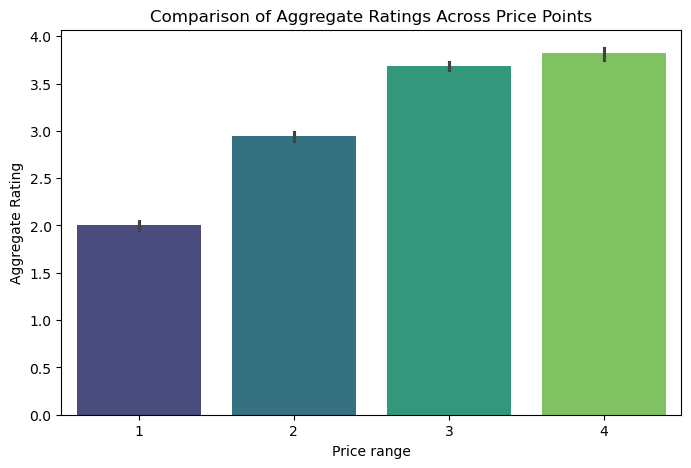

In [227]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Price range', y='Aggregate rating', data=df, palette='viridis')
plt.xlabel('Price range')
plt.ylabel('Aggregate Rating')
plt.title('Comparison of Aggregate Ratings Across Price Points')

plt.show()

- The above Visualisation shows clearly shows that the higher the price range, The higher the Aggregate Rating.
- My insights include:
- Restaurants with higher price ranges definitely have more ratings
- This shows that not all restaurants may have a rating system.
- Customers who visit restaurants with higher price ranges may be more tech-savy and are inclined to rate more.
- Customers visiting restaurants with higher price ranges may earn more.
- Those Customers may care about restaurant reviews online and they make diligent online research before visiting a restaurant.
- Restaurants with High price ranges have probably put in so much amount of work, effort and money to improve customer satisfaction.
- Customers who can afford it really don't care about the price as long as they are satisfied with the cuisines, what they are purchasing and the quality of purchase, restaurant environment and restaurant aesthetics.


- Restaurants with high price range probably have better Aesthetics too. An example is the typical Nigerian Buka and A high-end Amala and vibes restaurant.
- A high-end Amala and vibes restaurant offers pleasant Aesthetics and higher price range and definitely cares about ratings online because they know that their target-customer probably visits not only for the food but also the fine environment where they can create memories and have an amazing time with family and friends.
- A buka on the other hand does not really care about aesthetics and Online Ratings. So they do not invest so much in how the environment looks. The buka only serves the food and not the comfort and aesthetics that comes with it.
- The price range will definitely be higher for a high-end restaurant compared to a buka or a low-end restaurant. 

### Service Features
- This is an Analysis of Table Booking Availability and Online Delivery.

#### Comparison of Average Ratings with Table booking availability Across different cities

- As shown in the dataset, Table Booking Availability, will greatly and sincerely affect the aggregate ratings across different cities. This is because different customers can have different rates of satisfaction based on if they can reserve a table at the restaurant in advance. This ensures that a table is available at specific time and date, preventing wait times or unavailability during busy periods.

In [234]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


- I'll check the number of restaurants which has table booking and the total number of restaurants without the table booking option using value counts method
- I'll also visualise the Distribution of Restaurants with Table Booking option and without table booking. I'll use the countplot to visualise the distribution. 

In [242]:
df['Has Table booking'].value_counts()

Has Table booking
No     8393
Yes    1158
Name: count, dtype: int64

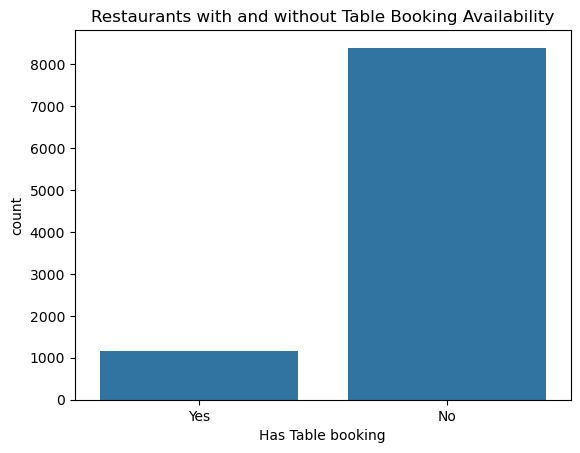

In [243]:
sns.countplot(x= 'Has Table booking', data =df)
plt.title('Restaurants with and without Table Booking Availability')

plt.show()

- The Visualisation above shows that only a small number of restaurants have the table booking option.
- The next question to ask is Do these restaurants with the table booking option have more ratings compared to those without the table booking option?

#### Visualisation of Ratings with Table Bookings Vs No Table Bookings
- I'll be doing this visualisation using my barplot
- I'll be using the magma color palette in my visualisation

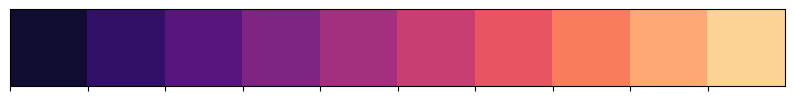

In [245]:
sns.palplot(sns.color_palette("magma", 10))

C:\Users\Ajayi Family\AppData\Local\Temp\ipykernel_6932\3229057646.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Has Table booking', y='Aggregate rating', data=df, palette='magma')


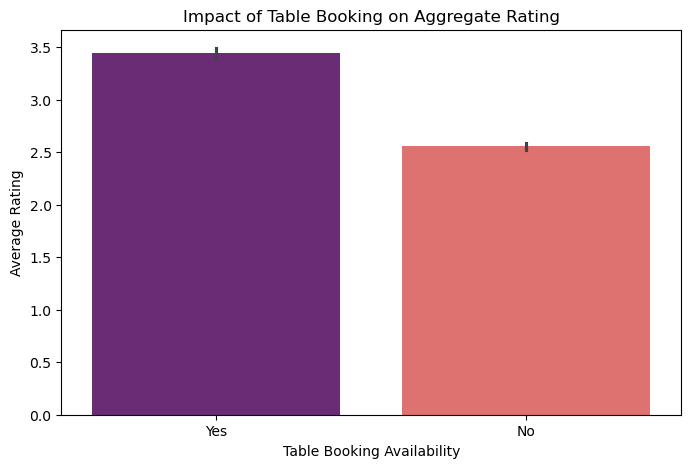

In [246]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Has Table booking', y='Aggregate rating', data=df, palette='magma')
plt.xlabel('Table Booking Availability')
plt.ylabel('Average Rating')
plt.title('Impact of Table Booking on Aggregate Rating')

plt.show()

- From the Visuals above, It is evident that restaurants with Table Booking has highest Average ratings compared with Restaurants who do not have the table booking option.
- Restaurants without Table booking availability, only have the highest average rating of 2.5

#### Online Delivery Availability

- I want to check for the percentage of restaurants offering online delivery.

In [251]:
online_delivery_percentage = (df['Has Online delivery'].value_counts(normalize=True) * 100)

In [252]:
online_delivery_percentage

Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64

- The results above shows that 75% of the restaurants does not offer online delivery.
- This can lead to poor ratings as many customers would be more satisfied with having their food delivered to their comfort zones such as their homes or offices.


- The Visualization below shows the count of restaurants with and without online delivery

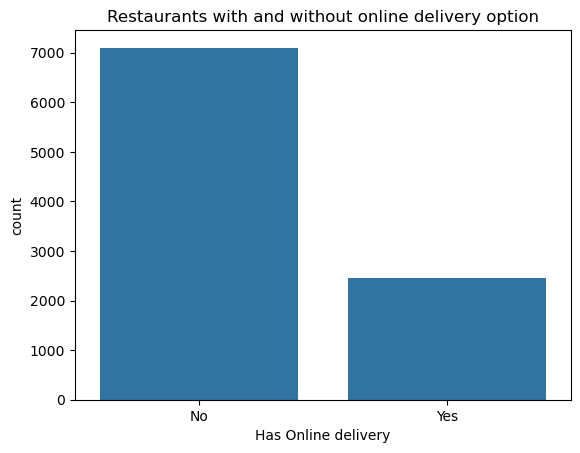

In [255]:
sns.countplot(x= 'Has Online delivery', data=df )
plt.title('Restaurants with and without online delivery option')

plt.show()

#### Availability of Online Delivery Across different price ranges

C:\Users\Ajayi Family\AppData\Local\Temp\ipykernel_6932\1850055578.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Has Online delivery', y='Price range', data=df, palette='magma')


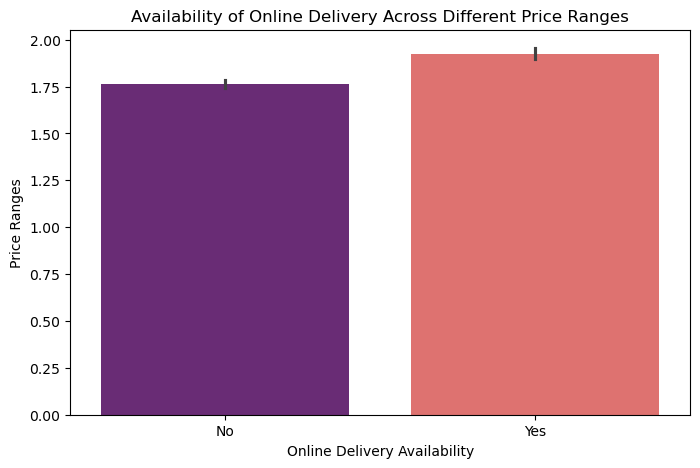

In [258]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Has Online delivery', y='Price range', data=df, palette='magma')
plt.xlabel('Online Delivery Availability')
plt.ylabel('Price Ranges')
plt.title('Availability of Online Delivery Across Different Price Ranges')

plt.show()

- The visuals show that availability of online Delivery does not really have effect on the price range
- Restaurants with online delivery option only have a slightly increased price range compared to other restaurants without the online delivery option.
- Overall, Online delivery does not really affect price range. 

### Customer Preferences

- The main aim of this part is to:

- Identify specific cuisines that consistently receive higher ratings.
- Determine city-specific preferences

#### Cuisines Which Consistently received Higher Ratings

- Under this section I'll check for the cuisines which have all been consistently rated across different cities
- This is a good indication of which customers consistently rated certain cuisines and in which cities were the cuisines most consistently Rated. 

In [270]:
most_consistent = (df.groupby(['City', 'Cuisines'])['Aggregate rating'].mean().reset_index())

In [273]:
most_consistent

,City,Cuisines,Aggregate rating
0,Abu Dhabi,American,4.60
1,Abu Dhabi,"American, Desserts",4.60
2,Abu Dhabi,"American, Mexican, Seafood",4.00
3,Abu Dhabi,Asian,4.60
4,Abu Dhabi,Chinese,4.20
...,...,...,...
3019,��stanbul,Restaurant Cafe,3.85
3020,��stanbul,"Restaurant Cafe, Desserts",4.20
3021,��stanbul,"Restaurant Cafe, Turkish, Desserts",4.20
3022,��stanbul,Turkish,4.10


- The analysis above using shows the most consistently rated cuisines and their cities with the Aggregate Rating.

### Week 4

- Objectives of Week 4 include:
-  Feature Engineering
- Extract additional features from existing columns.
- Create new features by encoding categorical variables.
- Model Building
- Build regression models to predict restaurant ratings.
- Split data into training and testing sets.
- Model Evaluation
- Evaluate using RMSE, MAE, and R-squared. Compare different algorithms like linear regression and random forest

#### Feature Engineering

Feature Engineering involves the addition of extra features from preexisting columns. But before I delve into feature engineering, I want to drop unnecessary columns which will prevent accurate prediction. 

- Dropping Unnecessary Columns in my dataset.
- I'll be doing this to enhance easy prediction as all of all these extra columns can cause problems with encoding. 

In [282]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [283]:
new_data = df.drop(columns=['Restaurant ID','Restaurant Name','Address','Locality','Locality Verbose','Longitude','Latitude','Votes', 'Average Cost for two', 'Cuisines', 'City']) 		 		 	

In [285]:
new_data

,Country Code,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text
0,162,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent
1,162,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent
2,162,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good
3,162,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent
4,162,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent
...,...,...,...,...,...,...,...,...,...,...
9546,208,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good
9547,208,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good
9548,208,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good
9549,208,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good


#### Feature Engineering Continued

In [289]:
new_data['Affordable_and_highly_rated']=((new_data['Price range'] == 2) & (new_data['Aggregate rating'] > 4.0)).map({True: 'Yes', False: 'No'})

In [290]:
new_data

,Country Code,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Affordable_and_highly_rated
0,162,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,No
1,162,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,No
2,162,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,No
3,162,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,No
4,162,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...
9546,208,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,No
9547,208,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,No
9548,208,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,No
9549,208,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,No


In [292]:
new_data['Expensive_and_highly_rated']=((new_data['Price range'] == 3) & (new_data['Aggregate rating'] > 4.0)).map({True: 'Yes', False: 'No'})

In [295]:
new_data

,Country Code,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Affordable_and_highly_rated,Expensive_and_highly_rated
0,162,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,No,Yes
1,162,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,No,Yes
2,162,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,No,No
3,162,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,No,No
4,162,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
9546,208,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,No,Yes
9547,208,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,No,Yes
9548,208,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,No,No
9549,208,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,No,No


In [297]:
new_data['Expensive_and_low_rating']=((new_data['Price range'] == 3) & (new_data['Aggregate rating']< 2.0)).map({True: 'Yes', False: 'No'})

In [298]:
new_data

,Country Code,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Affordable_and_highly_rated,Expensive_and_highly_rated,Expensive_and_low_rating
0,162,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,No,Yes,No
1,162,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,No,Yes,No
2,162,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,No,No,No
3,162,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,No,No,No
4,162,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,208,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,No,Yes,No
9547,208,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,No,Yes,No
9548,208,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,No,No,No
9549,208,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,No,No,No


#### Full service Option

- The purpose of this optiion is to check if the restaurants have both table booking and online delivery

In [301]:
new_data['Full_Service'] = np.where((df['Has Table booking'] == 'Yes') & (df['Has Online delivery'] == 'Yes'), 'Yes', 'No')

In [304]:
new_data

,Country Code,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Affordable_and_highly_rated,Expensive_and_highly_rated,Expensive_and_low_rating,Full_Service
0,162,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,No,Yes,No,No
1,162,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,No,Yes,No,No
2,162,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,No,No,No,No
3,162,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,No,No,No,No
4,162,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,208,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,No,Yes,No,No
9547,208,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,No,Yes,No,No
9548,208,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,No,No,No,No
9549,208,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,No,No,No,No


### Premium Dine In

- This feature identifies a restaurant which is expensive and offers table booking

In [308]:
new_data['Premium_Dine_In'] = np.where((df['Has Table booking'] == 'Yes') & (df['Price range'] > 2), 'Yes', 'No')

In [312]:
new_data

,Country Code,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Affordable_and_highly_rated,Expensive_and_highly_rated,Expensive_and_low_rating,Full_Service,Premium_Dine_In
0,162,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,No,Yes,No,No,Yes
1,162,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,No,Yes,No,No,Yes
2,162,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,No,No,No,No,Yes
3,162,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,No,No,No,No,No
4,162,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,208,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,No,Yes,No,No,No
9547,208,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,No,Yes,No,No,No
9548,208,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,No,No,No,No,No
9549,208,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,No,No,No,No,No


#### Solving The Outliers and Skewness Problem in my target variable

In [319]:
new_data['Aggregate rating'].value_counts()

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64

\- The previous visualisations and the above shows that my target variable is skewed to the right. Let's adjust it using the logarithm transformation.

In [323]:
new_data['log_Aggregate_rating'] = np.log1p(new_data['Aggregate rating'])

In [325]:
new_data

,Country Code,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Affordable_and_highly_rated,Expensive_and_highly_rated,Expensive_and_low_rating,Full_Service,Premium_Dine_In,log_Aggregate_rating
0,162,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,No,Yes,No,No,Yes,1.757858
1,162,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,No,Yes,No,No,Yes,1.704748
2,162,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,No,No,No,No,Yes,1.686399
3,162,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,No,No,No,No,No,1.774952
4,162,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,No,No,No,No,Yes,1.757858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,208,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,No,Yes,No,No,No,1.629241
9547,208,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,No,Yes,No,No,No,1.648659
9548,208,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,No,No,No,No,No,1.547563
9549,208,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,No,No,No,No,No,1.609438


#### Data Preprocessing

In [329]:
x = new_data.drop(columns=['Aggregate rating', 'log_Aggregate_rating'])
y = new_data['log_Aggregate_rating']

In [332]:
x

,Country Code,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Rating color,Rating text,Affordable_and_highly_rated,Expensive_and_highly_rated,Expensive_and_low_rating,Full_Service,Premium_Dine_In
0,162,Botswana Pula(P),Yes,No,No,No,3,Dark Green,Excellent,No,Yes,No,No,Yes
1,162,Botswana Pula(P),Yes,No,No,No,3,Dark Green,Excellent,No,Yes,No,No,Yes
2,162,Botswana Pula(P),Yes,No,No,No,4,Green,Very Good,No,No,No,No,Yes
3,162,Botswana Pula(P),No,No,No,No,4,Dark Green,Excellent,No,No,No,No,No
4,162,Botswana Pula(P),Yes,No,No,No,4,Dark Green,Excellent,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,208,Turkish Lira(TL),No,No,No,No,3,Green,Very Good,No,Yes,No,No,No
9547,208,Turkish Lira(TL),No,No,No,No,3,Green,Very Good,No,Yes,No,No,No
9548,208,Turkish Lira(TL),No,No,No,No,4,Yellow,Good,No,No,No,No,No
9549,208,Turkish Lira(TL),No,No,No,No,4,Green,Very Good,No,No,No,No,No


In [334]:
y

0       1.757858
1       1.704748
2       1.686399
3       1.774952
4       1.757858
          ...   
9546    1.629241
9547    1.648659
9548    1.547563
9549    1.609438
9550    1.609438
Name: log_Aggregate_rating, Length: 9551, dtype: float64

#### Data Splitting

- At this point, I will split my data into train inputs and test input, train target and test target

In [348]:
from sklearn.model_selection import train_test_split

In [350]:
train_inputs, test_input, train_target, test_target = train_test_split(x, y, test_size=0.2, random_state=42) 

In [352]:
encoder = OneHotEncoder(drop='first')

In [354]:
train_inputs

,Country Code,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Rating color,Rating text,Affordable_and_highly_rated,Expensive_and_highly_rated,Expensive_and_low_rating,Full_Service,Premium_Dine_In
1115,1,Indian Rupees(Rs.),Yes,No,No,No,3,Orange,Average,No,No,No,No,Yes
7633,1,Indian Rupees(Rs.),No,No,No,No,1,Orange,Average,No,No,No,No,No
8267,1,Indian Rupees(Rs.),No,No,No,No,1,White,Not rated,No,No,No,No,No
7209,1,Indian Rupees(Rs.),No,No,No,No,1,White,Not rated,No,No,No,No,No
6242,1,Indian Rupees(Rs.),No,No,No,No,2,Orange,Average,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1,Indian Rupees(Rs.),No,No,No,No,1,White,Not rated,No,No,No,No,No
5191,1,Indian Rupees(Rs.),No,Yes,No,No,2,Yellow,Good,No,No,No,No,No
5390,1,Indian Rupees(Rs.),No,No,No,No,1,White,Not rated,No,No,No,No,No
860,1,Indian Rupees(Rs.),No,No,No,No,4,Green,Very Good,No,No,No,No,No


In [356]:
new_num_cols = new_data.select_dtypes(include=np.number).columns
new_cat_cols = new_data.select_dtypes(['object']).columns 

In [358]:
new_data.dtypes

Country Code                     int64
Currency                        object
Has Table booking               object
Has Online delivery             object
Is delivering now               object
Switch to order menu            object
Price range                      int64
Aggregate rating               float64
Rating color                    object
Rating text                     object
Affordable_and_highly_rated     object
Expensive_and_highly_rated      object
Expensive_and_low_rating        object
Full_Service                    object
Premium_Dine_In                 object
log_Aggregate_rating           float64
dtype: object

In [360]:
train_cat = encoder.fit_transform(train_inputs[new_cat_cols])
test_cat = encoder.transform(test_input[new_cat_cols])

In [362]:
train_cat.toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [364]:
test_cat.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

#### Scaling

In [367]:
scaler = StandardScaler()

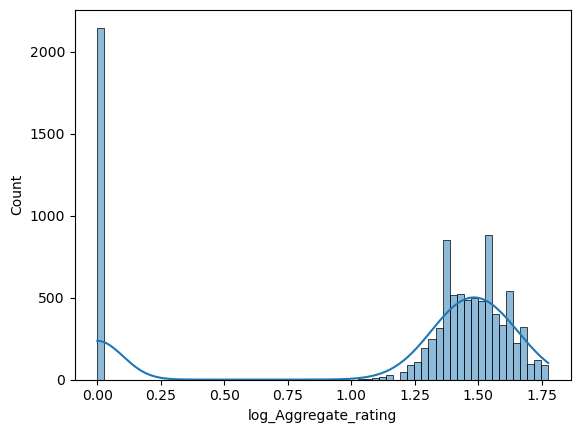

In [369]:
sns.histplot(new_data['log_Aggregate_rating'], kde=True)
plt.show()

In [370]:
new_num_cols

Index(['Country Code', 'Price range', 'Aggregate rating',
       'log_Aggregate_rating'],
      dtype='object')

In [373]:
numerical_column = ['Price range']

In [375]:
train_num = scaler.fit_transform(train_inputs[numerical_column])
test_num = scaler.transform(test_input[numerical_column])

In [377]:
train_num

array([[ 1.3159881 ],
       [-0.89298676],
       [-0.89298676],
       ...,
       [-0.89298676],
       [ 2.42047553],
       [ 0.21150067]])

In [379]:
test_num

array([[-0.89298676],
       [ 0.21150067],
       [ 0.21150067],
       ...,
       [ 0.21150067],
       [ 1.3159881 ],
       [ 1.3159881 ]])

In [381]:
train_processed = np.hstack((train_num, train_cat.toarray()))
test_processed = np.hstack((test_num, test_cat.toarray()))

In [383]:
train_processed

array([[ 1.3159881 ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.89298676,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.89298676,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.89298676,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.42047553,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.21150067,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

#### Model Selection

In [386]:
model = LinearRegression()

In [388]:
model.fit(train_processed, train_target)

LinearRegression()

In [389]:
train_pred = model.predict(train_processed)
test_pred = model.predict(test_processed)

#### Model Evaluation

In [391]:
train_mse = mean_squared_error(train_pred, train_target)
test_mse = mean_squared_error(test_pred, test_target)

In [392]:
train_mse, test_mse

(0.0019627246376074286, 0.0019381056976309032)

#### Model Performance

In [394]:
train_score = r2_score(train_target, train_pred)
test_score = r2_score(test_target, test_pred)

In [395]:
train_score, test_score

(0.9950496807840477, 0.9950412599158522)

 - It seems like my model has perfectly overfit????
 - I want to add new numerical columns from my old dataset (df) to check for variations in my prediction
 - I want to evaluate my model based on different factors 

#### Decision Tree Regressor

After having imported my decision tree regressor, I will do my data splitting and run my model

In [405]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [406]:
x_train

,Country Code,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Rating color,Rating text,Affordable_and_highly_rated,Expensive_and_highly_rated,Expensive_and_low_rating,Full_Service,Premium_Dine_In
1115,1,Indian Rupees(Rs.),Yes,No,No,No,3,Orange,Average,No,No,No,No,Yes
7633,1,Indian Rupees(Rs.),No,No,No,No,1,Orange,Average,No,No,No,No,No
8267,1,Indian Rupees(Rs.),No,No,No,No,1,White,Not rated,No,No,No,No,No
7209,1,Indian Rupees(Rs.),No,No,No,No,1,White,Not rated,No,No,No,No,No
6242,1,Indian Rupees(Rs.),No,No,No,No,2,Orange,Average,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1,Indian Rupees(Rs.),No,No,No,No,1,White,Not rated,No,No,No,No,No
5191,1,Indian Rupees(Rs.),No,Yes,No,No,2,Yellow,Good,No,No,No,No,No
5390,1,Indian Rupees(Rs.),No,No,No,No,1,White,Not rated,No,No,No,No,No
860,1,Indian Rupees(Rs.),No,No,No,No,4,Green,Very Good,No,No,No,No,No


In [407]:
encoder = OneHotEncoder(drop="first")
cat_train = encoder.fit_transform(x_train[new_cat_cols])
cat_test = encoder.transform(x_test[new_cat_cols])
cat_train

<7640x29 sparse matrix of type '<class 'numpy.float64'>'
	with 24324 stored elements in Compressed Sparse Row format>

In [411]:
new_cat_cols

Index(['Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text', 'Affordable_and_highly_rated',
       'Expensive_and_highly_rated', 'Expensive_and_low_rating',
       'Full_Service', 'Premium_Dine_In'],
      dtype='object')

In [413]:
numerical_column

['Price range']

In [415]:
scaler = StandardScaler()
num_train = scaler.fit_transform(x_train[numerical_column])
num_test = scaler.transform(x_test[numerical_column])
num_train

array([[ 1.3159881 ],
       [-0.89298676],
       [-0.89298676],
       ...,
       [-0.89298676],
       [ 2.42047553],
       [ 0.21150067]])

In [417]:
train_processed = np.hstack((cat_train.toarray(), num_train))
test_processed = np.hstack((cat_test.toarray(), num_test))

In [419]:
model = DecisionTreeRegressor(random_state=42)
model.fit(train_processed, y_train)

DecisionTreeRegressor(random_state=42)

In [421]:
y_pred2 = model.predict(test_processed)

In [423]:
y_pred2

array([1.19289961, 1.65066656, 1.39710112, ..., 1.39710112, 1.65212292,
       1.66216889])

In [425]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [427]:
score = r2_score(y_test, y_pred2)

In [429]:
score

0.9954062272353306

Wow! Here are a number of observations I have. 
- When I dropped two columns in my new_data, These two columns are 'Rating text' and 'Rating color', my model prediction dropped drastically to about 26% r2 accuracy score.
- When I dropped my rating color, That only the rating text was present, I still had a 99% accuracy from both linear regression and my decision tree Regressor
- When I dropped my rating text and left only rating color in my dataset, I still had an accuracy of 99% which indicated that both of these columns both had independent effects on my prediction.
- When I added country code and currency to my dataset, I redid my predictions again using my decision Tree and Linear Regression. I seemed to have an accuracy of 99.5%
- When I dropped my rating text and Rating color, leaving currency and country code, I had an R2 score of 28% from decision tree and 27% from linear regression
- Although I'm scared of overfitting but I feel that both my models generalized properly to the dataset
- Are those two columns leaking information to the test pred?

In [432]:
error =  train_target - train_pred

In [434]:
prediction_table = pd.DataFrame({
                        'Actual' : train_target,
                        'Predicted' : train_pred,
                        'Error' : error
})

In [ ]:
prediction_table

- The Prediction table shows each of the predictions
- It shows actual value
- The Error in Prediction
- Overall, The model generalises very well to the data

#### Mean Absolute Error

In [ ]:
print('MSE :', mean_squared_error(train_target, train_pred))

The Mean squared error for my linear regression is 0.0018. This error is quite very low

## Insights From My Prediction

- A restaurant's rating is a reflection of customer experience, service quality and overall brand perception.
- However, It can be influenced by different factors. All contributing to what the customer feels
- Cuisines are not the only determining factor of a restaurant's rating
- Refining features and Feature selection will create a more robust dataset and will help build better predictive models


- The ratings seem too predictable as certain ratings are expected of certain regions
- My findings have also suggesed that food quality and taste correlate with high ratings
- Due to the high predictive value 99, could it be that the model isn't really predicting but giving out encoded information in my dataset???